<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/coorelation/folder/Vix_Risk_on_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [105]:
window_size=10

In [106]:
data=pd.read_csv('/content/vix.csv')

In [107]:
data.columns

Index(['time', 'open', 'high', 'low', 'close', 'INDIAVIX, NSE: Open',
       'INDIAVIX, NSE: High', 'INDIAVIX, NSE: Low', 'INDIAVIX, NSE: Close',
       'Volume', 'Volume MA'],
      dtype='object')

In [108]:
data=data[['time','close','INDIAVIX, NSE: Close']]

In [109]:
data['vol']=data['close'].pct_change().rolling(window_size).std()*(252**0.5)*100

In [110]:
data['vix_ema']=data['INDIAVIX, NSE: Close'].ewm(span=7).mean()

In [111]:
data['signal']=(data['INDIAVIX, NSE: Close']-data['vol']).rolling(window=5).mean()

In [112]:
data.tail(5)

,time,close,"INDIAVIX, NSE: Close",vol,vix_ema,signal
1823,1642995900,17149.100,22.825001,16.260052,19.058511,6.085080
1824,1643082300,17277.949,21.357500,17.017517,19.633258,5.656141
1825,1643255100,17110.150,21.065001,15.517111,19.991194,5.646240
1826,1643341500,17101.949,20.695000,15.118131,20.167146,5.652604
1827,1643600700,17339.850,21.952499,18.113464,20.613484,5.173745


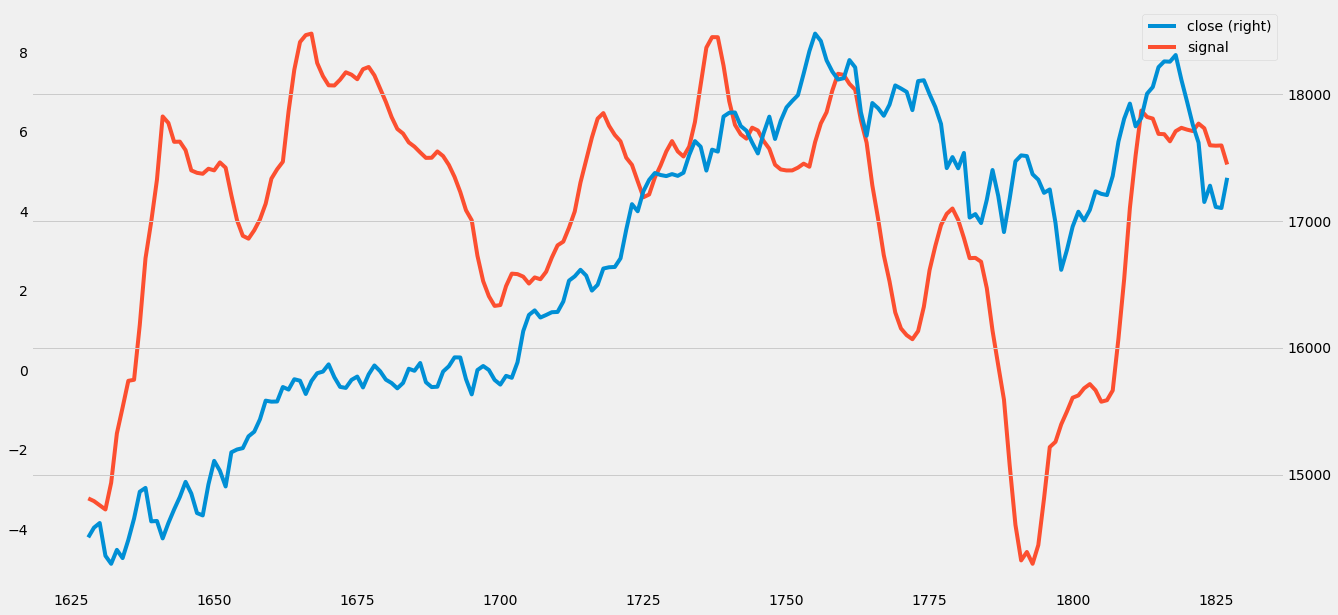

In [113]:
data[['close','signal']][-200:].plot(secondary_y='close');

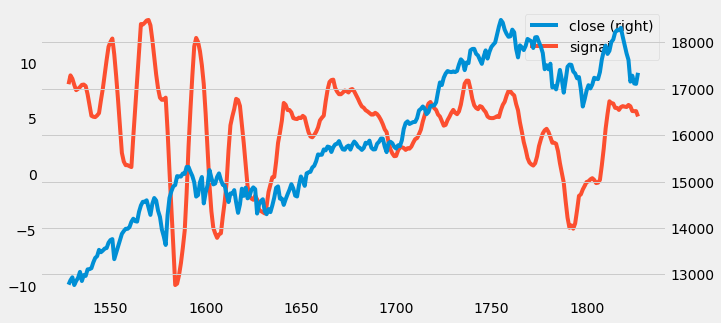

In [116]:
data[['close','signal']][-300:].plot(secondary_y='close',figsize=(10,5));

In [117]:
data_subset=data[['close','signal']]

In [118]:
data_subset.columns=['close','close1']

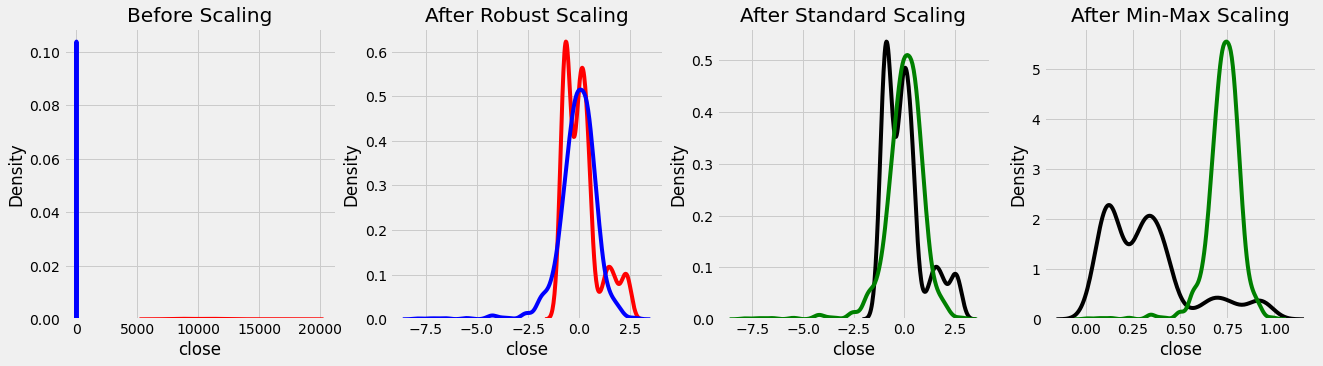

In [119]:
# Importing libraries
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
matplotlib.style.use('fivethirtyeight')

# data
x = data_subset
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['close','close1'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['close','close1'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['close','close1'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['close'], ax = ax1, color ='r')
sns.kdeplot(x['close1'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['close'], ax = ax2, color ='red')
sns.kdeplot(robust_df['close1'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['close'], ax = ax3, color ='black')
sns.kdeplot(standard_df['close1'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['close'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['close1'], ax = ax4, color ='g')
plt.show()


In [120]:
standard_df['diff']=standard_df['close']+standard_df['close1']
standard_df['mov_avg']=standard_df['diff'].ewm(span=15).mean()
standard_df=standard_df[-200:]

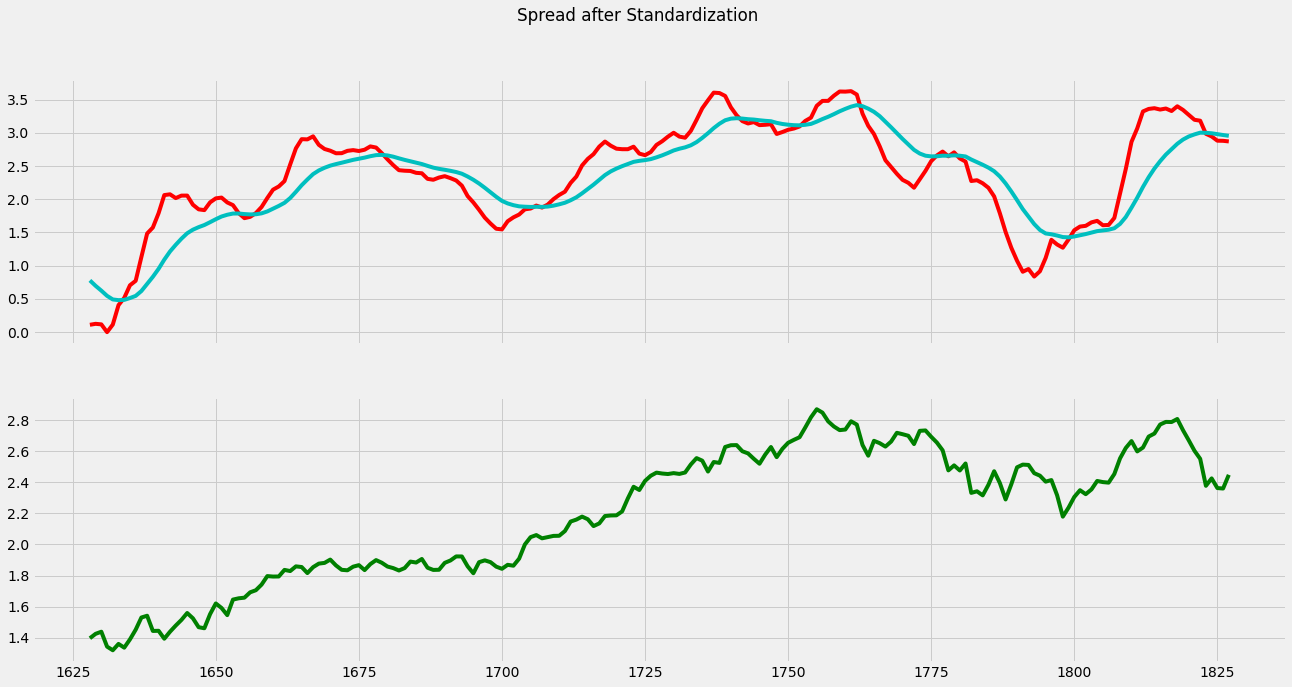

In [121]:
plt.rcParams["figure.figsize"] = (20,10)
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].plot(standard_df['diff'],color='r')
ax[0].plot(standard_df['mov_avg'],color='c')

ax[1].plot(standard_df['close'],color='g')
plt.suptitle('Spread after Standardization')
plt.show()